In [12]:
# Import packages
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Set some formatting options for pandas
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [13]:
# Import dataset
df = pd.read_csv(r'dataset\machine_learning_dataset.csv', sep='|')
df.head()

,feature_current_ratio,feature_return_on_equity,feature_debt_to_equity_ratio,feature_operating_cash_flow_ratio,feature_interest_coverage_ratio,feature_ebit_to_total_assets,feature_free_cash_flow_ratio,feature_price_to_earnings_ratio,feature_payables_to_receivables_ratio,feature_debt_ratio,financial_year_end,one_year_holding_return,stock_isin
0,1.210,0.035,0.943,1.937,-5.164,0.041,0.130,2.346,0.571,0.482,2017-12-31,-0.231,AN8068571086
1,1.166,0.136,0.938,1.790,-5.550,0.045,0.126,2.499,0.598,0.481,2018-12-31,-0.663,AN8068571086
2,1.186,-0.310,1.353,1.829,-4.875,0.053,0.141,2.517,0.618,0.571,2019-12-31,0.973,AN8068571086
3,1.231,-0.728,2.481,1.778,-2.941,0.039,0.103,1.820,0.560,0.706,2020-12-31,0.543,AN8068571086
4,1.705,0.207,1.446,0.626,-14.450,0.085,0.092,322.600,0.461,0.589,2017-12-31,-0.051,ANN4327C1220


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   feature_current_ratio                  4593 non-null   float64
 1   feature_return_on_equity               4596 non-null   float64
 2   feature_debt_to_equity_ratio           4596 non-null   float64
 3   feature_operating_cash_flow_ratio      4314 non-null   float64
 4   feature_interest_coverage_ratio        4239 non-null   float64
 5   feature_ebit_to_total_assets           4599 non-null   float64
 6   feature_free_cash_flow_ratio           4312 non-null   float64
 7   feature_price_to_earnings_ratio        4582 non-null   float64
 8   feature_payables_to_receivables_ratio  4381 non-null   float64
 9   feature_debt_ratio                     4599 non-null   float64
 10  financial_year_end                     4612 non-null   object 
 11  one_

In [15]:
df.dropna(inplace=True)
df.describe()

,feature_current_ratio,feature_return_on_equity,feature_debt_to_equity_ratio,feature_operating_cash_flow_ratio,feature_interest_coverage_ratio,feature_ebit_to_total_assets,feature_free_cash_flow_ratio,feature_price_to_earnings_ratio,feature_payables_to_receivables_ratio,feature_debt_ratio,one_year_holding_return
count,3893.000,3893.000,3893.000,3893.000,3893.000,3893.000,3893.000,3893.000,3893.000,3893.000,3893.000
mean,3.260,-0.065,2.295,1.882,275.145,-0.082,0.047,141.076,1.732,0.878,0.229
std,22.652,6.869,18.715,29.638,47553.724,2.683,0.439,632.774,23.701,13.844,3.214
min,0.000,-169.440,-191.576,-220.824,-1197805.000,-151.211,-9.131,-0.140,-46.036,0.000,-0.998
25%,0.960,-0.050,0.609,0.515,-12.918,-0.014,0.016,2.607,0.320,0.421,-0.258
50%,1.388,0.090,1.225,1.004,-4.011,0.035,0.082,11.903,0.593,0.569,0.001
75%,2.193,0.188,2.369,1.650,1.423,0.067,0.143,60.456,0.980,0.720,0.303
max,1098.975,195.951,615.750,1090.692,2684120.167,0.978,20.112,12406.586,917.894,842.140,172.059


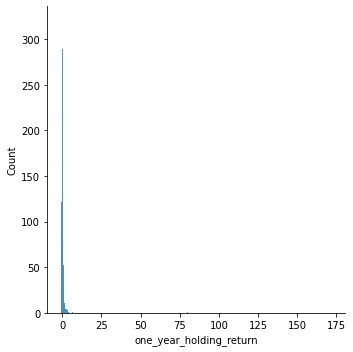

In [22]:
sns.displot(df['one_year_holding_return'])


In [24]:
from scipy import stats
df = df.drop(columns=['financial_year_end','stock_isin'])
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df.describe()


,feature_current_ratio,feature_return_on_equity,feature_debt_to_equity_ratio,feature_operating_cash_flow_ratio,feature_interest_coverage_ratio,feature_ebit_to_total_assets,feature_free_cash_flow_ratio,feature_price_to_earnings_ratio,feature_payables_to_receivables_ratio,feature_debt_ratio,one_year_holding_return
count,3734.000,3734.000,3734.000,3734.000,3734.000,3734.000,3734.000,3734.000,3734.000,3734.000,3734.000
mean,2.373,-0.013,1.812,1.049,39.324,-0.008,0.059,81.545,0.941,0.585,0.141
std,4.312,1.137,4.580,6.264,1314.182,0.188,0.186,221.380,2.303,0.362,0.792
min,0.000,-17.380,-52.683,-79.387,-37823.143,-2.139,-1.267,-0.140,-46.036,0.000,-0.993
25%,0.970,-0.050,0.631,0.522,-13.289,-0.013,0.019,2.703,0.317,0.420,-0.257
50%,1.397,0.089,1.230,1.004,-4.177,0.036,0.083,11.873,0.586,0.564,0.000
75%,2.194,0.184,2.356,1.642,1.197,0.067,0.143,57.429,0.961,0.711,0.301
max,64.764,19.785,50.455,89.069,36206.000,0.978,1.187,2032.765,69.222,8.803,9.592


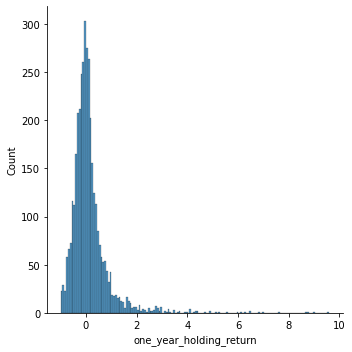

In [25]:
sns.displot(df['one_year_holding_return'])


In [26]:
X = df.drop(columns=['one_year_holding_return'])
y = df['one_year_holding_return']
X.shape, y.shape


((3734, 10), (3734,))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.25)
print('x training dimensions: ', X_train.shape)
print('x testing dimensions: ', X_test.shape)
print('y training dimensions: ', y_train.shape)
print('y testing dimensions: ', y_test.shape)


x training dimensions:  (2800, 10)
x testing dimensions:  (934, 10)
y training dimensions:  (2800,)
y testing dimensions:  (934,)


In [28]:
def plot_actual_vs_predicted(y_actual, y_pred):
  highest_value = min(np.amax(y_actual), np.amax(y_pred))
  lowest_value = min(np.amin(y_actual), np.amin(y_pred))
  highest_value_rounded = round(highest_value/10)*10
  lowest_value_rounded = round(lowest_value/10)*10
  plt.subplots(figsize=(7.5, 7.5))
  plt.xlim(lowest_value_rounded, highest_value_rounded)
  plt.ylim(lowest_value_rounded, highest_value_rounded)
  plt.xlabel('Actual', fontsize=10)
  plt.ylabel('Predicted', fontsize=10)
  # Straight line
  line = [lowest_value_rounded, highest_value_rounded]
  sns.scatterplot(x=y_actual, y=y_pred)
  sns.lineplot(x=line, y=line)


Model: Pipeline
MSE: 0.5367
R2: -0.0040
Coefficients:
Intercept: 0.1523
feature_current_ratio: -0.01
feature_return_on_equity: -0.02
feature_debt_to_equity_ratio: -0.00
feature_operating_cash_flow_ratio: 0.02
feature_interest_coverage_ratio: 0.00
feature_ebit_to_total_assets: -0.03
feature_free_cash_flow_ratio: 0.04
feature_price_to_earnings_ratio: 0.03
feature_payables_to_receivables_ratio: -0.02
feature_debt_ratio: -0.01


C:\Users\Michael.CamdenSmith\Anaconda3\envs\StockAnalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='one_year_holding_return'>

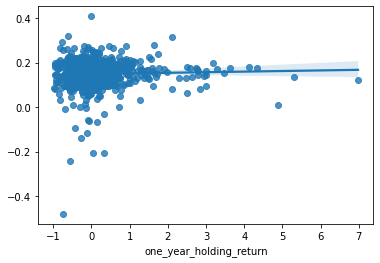

In [29]:
# Ridge Model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from numpy import arange

# # define model evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = LinearRegression()

model = Pipeline(
    [('scaler', PowerTransformer()),
     ('model', model)]
)

# Train the model using the training sets
model.fit(X_train, y_train)

model_name = type(model).__name__
intercept = format(model['model'].intercept_, '.4f')
y_pred_testing = model.predict(X_test)
y_pred_training = model.predict(X_train)
coefficients = ['%.2f' % elem for elem in model['model'].coef_]
train_r_squared = format(r2_score(y_train, y_pred_training), '.4f')
test_r_squared = format(r2_score(y_test, y_pred_testing), '.4f')
train_mse = format(mean_squared_error(y_train, y_pred_training), '.4f')
test_mse = format(mean_squared_error(y_test, y_pred_testing), '.4f')


print(f"Model: {model_name}")
print(f"MSE: {test_mse}")
print(f"R2: {test_r_squared}")
print(f"Coefficients:")
print(f"Intercept: {intercept}")
for x, y in zip(X_train.columns, coefficients):
  print(f"{x}: {y}")
sns.regplot(y_test, y_pred_testing)
